In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
eyesdetector = cv2.CascadeClassifier("third-party/frontalEyes35x16.xml")
mostdetector = cv2.CascadeClassifier("third-party/Nose18x15.xml")

In [134]:

fullimg=cv2.imread("Before.png")
fullimg=cv2.cvtColor(fullimg,cv2.COLOR_BGR2RGB)

In [135]:

overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

mostache=cv2.imread("mustache.png",-1)
mostache=cv2.cvtColor(mostache,cv2.COLOR_BGRA2RGBA)


In [136]:
eyes=eyesdetector.detectMultiScale(fullimg,1.4,5)

In [137]:
eyes

array([[ 66, 108, 188,  86]], dtype=int32)

In [138]:
eyes

array([[ 66, 108, 188,  86]], dtype=int32)

In [139]:

x,y,w,h=eyes[0]

overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

overlay=cv2.resize(overlay,(w,h))
for i in range(overlay.shape[0]):
    for j in range(overlay.shape[1]):
        if(overlay[i,j,3]>0):
            fullimg[y+i+3,x+j-1,:]=overlay[i,j,:-1]

#     fullimg[y:y+w,x:x+h,:] = overlay[:,:,:]

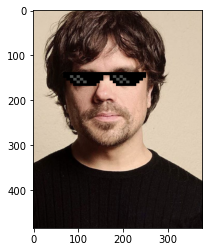

In [140]:
plt.imshow(fullimg)

In [141]:
mts=mostdetector.detectMultiScale(fullimg,1.8,5)

In [142]:
mts

array([[126, 169,  58,  49]], dtype=int32)

In [143]:

x,y,w,h=mts[0]

mostache=cv2.resize(mostache,(w,h))

for i in range(mostache.shape[0]):
    for j in range(mostache.shape[1]):
        if(mostache[i,j,3]>0):
            fullimg[y+i+23,x+j+6,:]=mostache[i,j,:-1]

# fullimg[y:y+w,x:x+h]=mostache[:,:,:]    

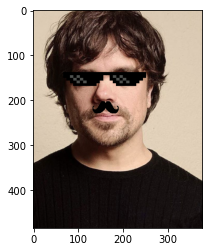

In [144]:
plt.imshow(fullimg)

In [145]:
fullimg.shape

(485, 377, 3)

In [146]:
fullimg = cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB)
cv2.imwrite("img.jpg", fullimg)

True

In [147]:
fullimg = fullimg.reshape((-1,3))

In [148]:
fullimg.shape

(182845, 3)

In [149]:
df = pd.DataFrame(fullimg, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)